# Thai Handwritten Character Recognition with Time Series (Time Series Midterm)

## Download dataset

In [0]:
!wget -q http://www.ai.rug.nl/~mrolarik/ALICE-THI/ALICE-THI-Dataset.tar.gz
!tar -xzf ALICE-THI-Dataset.tar.gz
!rm ALICE-THI-Dataset.tar.gz
!mv ALICE-THI\ Dataset/ALICE-THI\ Dataset.tar.gz .
!rm -rf ALICE-THI\ Dataset
!tar -xzf ALICE-THI\ Dataset.tar.gz
!rm ALICE-THI\ Dataset.tar.gz

## Install modules

In [0]:
!sudo apt-get -qq install python-opencv
!sudo apt-get -qq install python3-pandas
!sudo apt-get -qq install python3-matplotlib
!pip install fastdtw
!pip install scikit-learn

## Preprocessing

In [0]:
import cv2 as cv

def get_img(file, size=36):
  img = cv.imread(file, cv.IMREAD_GRAYSCALE)
  resized_img = cv.resize(img, (size, size), interpolation=cv.INTER_CUBIC)
  inverted_img = 255 - resized_img
  return inverted_img

## Features

- For the boundary feature, maximum distance value (height of image in pixels) is used for columns with no boundary.
- We use min-max normalization for simplicity.

In [0]:
import numpy as np

def get_projection(img):
  projection = np.apply_along_axis(np.sum, 0, img)
  normalized_projection = projection/(255 * img.shape[0])
  return normalized_projection

In [0]:
import numpy as np

UPPER_BOUNDARY = 0
LOWER_BOUNDARY = -1

def calculate_boundary(col, direction, threshold):
  ink = np.argwhere(col > threshold)
  if ink.size == 0:
    return col.shape[0]
  if direction == UPPER_BOUNDARY:
    return ink[direction][0]
  return col.shape[0] - ink[direction][0] - 1
  
def get_boundary(img, direction=UPPER_BOUNDARY, threshold=127):
  boundary = np.apply_along_axis(calculate_boundary, 0, img, direction, threshold)
  normalized_boundary = boundary/img.shape[0]
  return normalized_boundary
  

In [0]:
import numpy as np

def calculate_nbit(col, threshold):
  nbit = 0
  current_region = 0
  for pixel in col:
    if current_region == 0 and pixel > threshold:
      nbit += 1
      current_region = 255
    elif current_region == 255 and pixel < threshold:
      current_region = 0
  return nbit

def get_nbits(img, threshold=127):
  nbits = np.apply_along_axis(calculate_nbit, 0, img, threshold)
  normalized_nbits = nbits/8 # maximum nbits
  return normalized_nbits

## Utility functions

In [0]:
import os

def get_files(path):
  for subdir in os.listdir(path):
    subdir_path = os.path.join(path, subdir)
    for file in os.listdir(subdir_path):
      yield os.path.join(subdir_path, file)

In [0]:
import matplotlib.pyplot as plt

def display_plot(data):
  figure, axes = plt.subplots()
  axes.plot(data)
  plt.show()

## Batch process all files

In [0]:
import re

path = 'Thai_char_sqr'

file_names = []
features = []

for file_name in get_files(path):
  label = int(re.search(r'/(\d*)-', file_name).group(1))
  target_name = re.search(r'-([\w ]+)-\d+( - Copy)?.png$', file_name).group(1)
  img = get_img(file_name)
  projection = get_projection(img)
  upper_boundary = get_boundary(img, UPPER_BOUNDARY)
  lower_boundary = get_boundary(img, LOWER_BOUNDARY)
  nbits = get_nbits(img)
  file_names.append(file_name)
  features.append({ 'label': label, 'target_name': target_name, 'projection': projection, 'upper': upper_boundary, 'lower': lower_boundary, 'nbits': nbits })

In [0]:
display(dataset)

,label,lower,nbits,projection,target_name,upper
Thai_char_sqr/34/33-194-C2-YO YAK-1136.png,33,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032679...",YO YAK,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
Thai_char_sqr/34/33-194-C2-YO YAK-544.png,33,"[1.0, 1.0, 1.0, 0.4722222222222222, 0.38888888...","[0.0, 0.0, 0.0, 0.125, 0.125, 0.125, 0.125, 0....","[0.0, 0.00043572984749455336, 0.03616557734204...",YO YAK,"[1.0, 1.0, 1.0, 0.4166666666666667, 0.30555555..."
Thai_char_sqr/34/33-194-C2-YO YAK-1233.png,33,"[1.0, 1.0, 1.0, 1.0, 0.5277777777777778, 0.444...","[0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.25, 0.25,...","[0.0, 0.0, 0.0, 0.00010893246187363834, 0.1042...",YO YAK,"[1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 0.25,..."
Thai_char_sqr/34/33-194-C2-YO YAK-346.png,33,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.66666666...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002178649237...",YO YAK,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.25, 0.16..."
Thai_char_sqr/34/33-194-C2-YO YAK-1052.png,33,"[1.0, 1.0, 1.0, 1.0, 0.6388888888888888, 0.472...","[0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.125, 0.12...","[0.0, 0.0, 0.00010893246187363834, 0.021459694...",YO YAK,"[1.0, 1.0, 1.0, 1.0, 0.25, 0.1388888888888889,..."
Thai_char_sqr/34/33-194-C2-YO YAK-71.png,33,"[1.0, 0.5833333333333334, 0.5555555555555556, ...","[0.0, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125...","[0.00021786492374727668, 0.09183006535947713, ...",YO YAK,"[1.0, 0.3055555555555556, 0.2777777777777778, ..."
Thai_char_sqr/34/33-194-C2-YO YAK-794.png,33,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6388888888888...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000435729847494553...",YO YAK,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2777777777777..."
Thai_char_sqr/34/33-194-C2-YO YAK-604.png,33,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.44444444...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0128540305010...",YO YAK,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.38888888..."
Thai_char_sqr/34/33-194-C2-YO YAK-1248.png,33,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.4444444444444...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.25, ...","[0.0, 0.0, 0.0, 0.0, 0.00010893246187363834, 0...",YO YAK,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.2222222222222222, ..."
Thai_char_sqr/34/33-194-C2-YO YAK-1275.png,33,"[1.0, 1.0, 0.7777777777777778, 0.7777777777777...","[0.0, 0.0, 0.125, 0.125, 0.125, 0.125, 0.25, 0...","[0.0, 0.0, 0.03932461873638344, 0.077777777777...",YO YAK,"[1.0, 1.0, 0.16666666666666666, 0.166666666666..."


## K-nearest neighbors classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, train_test_split

def get_classifier(n_neighbors=1, metric='minkowski'):
  classifier = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm='ball_tree', metric=metric)
  return classifier

In [0]:
cols = ['projection', 'upper', 'lower', 'nbits']
df_x = np.apply_along_axis(np.hstack, 1, dataset[cols].values)
df_y = dataset['label'].values
target_names = dataset[['label', 'target_name']].drop_duplicates().sort_values('label')['target_name'].tolist()
display(df_x.shape)
display(df_y.shape)

(14490, 144)

(14490,)

In [0]:
from sklearn import config_context
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

def print_target_names(arr):
  print('{}({}), {}({}), {}'.format(target_names[arr[0]], arr[0], target_names[arr[1]], arr[1], arr[2]))

with config_context(assume_finite=True):
  skf = StratifiedKFold(n_splits=5)
  for train, test in skf.split(df_x, df_y):
    x_train, x_test = df_x[train], df_x[test]
    y_train, y_test = df_y[train], df_y[test]
    display(x_train.shape, y_train.shape)
    display(x_test.shape, y_test.shape)
    kneigh = get_classifier()
    kneigh.fit(x_train, y_train)
    y_pred = kneigh.predict(x_test)
    display(y_test)
    display(y_pred)
    print(classification_report(y_test, y_pred, labels=range(len(target_names)), target_names=target_names))
    wrong_predictions = np.not_equal(y_test, y_pred)
    pairs = np.vstack((y_test[wrong_predictions], y_pred[wrong_predictions])).T
    unique, count = np.unique(pairs, return_counts=True, axis=0)
    ranks = np.argsort(count)[::-1]
    wrong_count = np.vstack((unique[ranks].T, count)).T
    print('test, pred, count')
    np.apply_along_axis(print_target_names, 0, wrong_count[wrong_count[:,2] > 1])
#     display(confusion_matrix(y_test, y_pred))

(11561, 144)

(11561,)

(2929, 144)

(2929,)

array([33, 33, 33, ..., 14, 14, 14])

array([33, 33, 33, ..., 14, 14, 14])

                  precision    recall  f1-score   support

          KO KAI       0.82      0.70      0.76        44
        KHO KHAI       0.63      0.58      0.60        45
       KHO KHUAT       0.75      0.49      0.59        43
       KHO KHWAI       0.46      0.55      0.50        42
        KHO KHON       0.64      0.60      0.62        42
     KHO RAKHANG       0.93      0.88      0.90        42
         NGO NGU       0.85      0.91      0.88        44
        CHO CHAN       0.83      0.91      0.87        44
       CHO CHING       0.88      0.93      0.90        41
       CHO CHANG       0.63      0.64      0.64        42
           SO SO       0.70      0.79      0.74        42
        CHO CHOE       0.90      0.83      0.86        42
         YO YING       0.95      0.91      0.93        43
        DO CHADA       0.73      0.67      0.70        45
        TO PATAK       0.65      0.77      0.71        44
        THO THAN       0.95      0.78      0.85        45
  THO NANGMON

(11582, 144)

(11582,)

(2908, 144)

(2908,)

array([33, 33, 33, ..., 14, 14, 14])

array([33, 33,  1, ..., 14, 47, 13])

                  precision    recall  f1-score   support

          KO KAI       0.86      0.68      0.76        44
        KHO KHAI       0.70      0.75      0.73        44
       KHO KHUAT       0.80      0.56      0.66        43
       KHO KHWAI       0.57      0.69      0.62        42
        KHO KHON       0.57      0.67      0.62        42
     KHO RAKHANG       0.89      0.98      0.93        41
         NGO NGU       0.82      0.91      0.86        44
        CHO CHAN       0.89      0.77      0.83        44
       CHO CHING       0.94      0.83      0.88        41
       CHO CHANG       0.66      0.50      0.57        42
           SO SO       0.62      0.74      0.67        42
        CHO CHOE       1.00      0.81      0.89        42
         YO YING       0.91      0.95      0.93        43
        DO CHADA       0.74      0.70      0.72        44
        TO PATAK       0.83      0.91      0.87        44
        THO THAN       0.95      0.80      0.86        44
  THO NANGMON

(11594, 144)

(11594,)

(2896, 144)

(2896,)

array([33, 33, 33, ..., 14, 14, 14])

array([33, 11, 60, ..., 15, 14, 14])

                  precision    recall  f1-score   support

          KO KAI       0.97      0.70      0.82        44
        KHO KHAI       0.69      0.61      0.65        44
       KHO KHUAT       0.87      0.64      0.74        42
       KHO KHWAI       0.57      0.64      0.61        42
        KHO KHON       0.58      0.62      0.60        42
     KHO RAKHANG       0.93      0.90      0.91        41
         NGO NGU       0.89      0.75      0.81        44
        CHO CHAN       0.82      0.74      0.78        43
       CHO CHING       0.92      0.88      0.90        41
       CHO CHANG       0.58      0.74      0.65        42
           SO SO       0.52      0.52      0.52        42
        CHO CHOE       0.89      0.83      0.86        41
         YO YING       0.98      0.98      0.98        43
        DO CHADA       0.60      0.57      0.58        44
        TO PATAK       0.62      0.66      0.64        44
        THO THAN       0.84      0.73      0.78        44
  THO NANGMON

(11607, 144)

(11607,)

(2883, 144)

(2883,)

array([33, 33, 33, ..., 14, 14, 14])

array([33, 32, 33, ..., 13, 14, 14])

                  precision    recall  f1-score   support

          KO KAI       0.89      0.79      0.84        43
        KHO KHAI       0.63      0.55      0.59        44
       KHO KHUAT       0.72      0.69      0.71        42
       KHO KHWAI       0.57      0.55      0.56        42
        KHO KHON       0.58      0.68      0.63        41
     KHO RAKHANG       0.93      0.90      0.91        41
         NGO NGU       0.91      0.89      0.90        44
        CHO CHAN       0.78      0.84      0.81        43
       CHO CHING       0.97      0.93      0.95        40
       CHO CHANG       0.60      0.69      0.64        42
           SO SO       0.69      0.61      0.65        41
        CHO CHOE       0.97      0.93      0.95        41
         YO YING       0.97      0.90      0.94        42
        DO CHADA       0.64      0.61      0.63        44
        TO PATAK       0.66      0.66      0.66        44
        THO THAN       0.91      0.73      0.81        44
  THO NANGMON

(11616, 144)

(11616,)

(2874, 144)

(2874,)

array([33, 33, 33, ..., 14, 14, 14])

array([33, 33, 33, ..., 14, 14, 14])

                  precision    recall  f1-score   support

          KO KAI       0.95      0.81      0.88        43
        KHO KHAI       0.67      0.66      0.67        44
       KHO KHUAT       0.71      0.57      0.63        42
       KHO KHWAI       0.45      0.55      0.49        42
        KHO KHON       0.59      0.63      0.61        41
     KHO RAKHANG       0.88      0.93      0.90        41
         NGO NGU       0.84      0.84      0.84        43
        CHO CHAN       0.87      0.93      0.90        43
       CHO CHING       0.95      0.90      0.92        40
       CHO CHANG       0.70      0.71      0.71        42
           SO SO       0.64      0.61      0.62        41
        CHO CHOE       0.95      0.85      0.90        41
         YO YING       0.97      0.83      0.90        42
        DO CHADA       0.78      0.66      0.72        44
        TO PATAK       0.71      0.80      0.75        44
        THO THAN       0.93      0.86      0.89        44
  THO NANGMON


## Demonstration

In [8]:
import numpy as np
import cv2 as cv

path = 'Thai_char_sqr'

shapes = [(cv.imread(file).shape[0]) for file in get_files(path)]

print(np.min(shapes)) # 9
print(np.max(shapes)) # 85
print(np.mean(shapes)) # 35.74

# We use mean size (36*36) as our default image size

9
85
35.74023464458247


In [9]:
testfile = 'Thai_char_sqr/1/0-161-A1-KO KAI-1002.png'
test_img = get_img(testfile)
print(test_img.shape)
print(test_img[:,:18])
test_projection = get_projection(test_img)
test_upper_boundary = get_boundary(test_img, UPPER_BOUNDARY)
test_lower_boundary = get_boundary(test_img, LOWER_BOUNDARY)
test_nbits = get_nbits(test_img)

print(test_projection)
print(test_upper_boundary)
print(test_lower_boundary)
print(test_nbits)

(36, 36)
[[  0   0   0   1   3   3   4   0   0   0   0   8 237 255 255 255 255 255]
 [  0   0   0   1   4   0   0 147 215 198 196 202 251 255 255 255 255 255]
 [  0   0   0   4   0   0 134 253 255 255 255 255 255 251 255 255 255 255]
 [  0   0   0   0  20 123 255 255 251 255 255 255 255 255 202 140 148 161]
 [  0   0   1   0  60 255 255 254 255 232 192 198 198 221  67   0   0   0]
 [  0   0   0   0  77 255 255 255 255 147   0   0   0   0   0   5   4   2]
 [  0   0   0 102 255 255 255 255 255 152   0   2   2   2   3   3   3   3]
 [  0   0   0  12 124 255 255 255 255 140   0   5   3   3   3   3   3   3]
 [  0   0   2   0  10 111  98 221 255 227 102   0   0   0   5   3   3   3]
 [  0   0   0   4   0   0   0 209 255 255 245  97 111  11   0   0   5   3]
 [  0   0   0   1   3   2   0 148 247 255 255 255 255 110  49  37   0   3]
 [  0   0   0   1   4   4   4   0 146 255 255 255 254 255 255 161   0   3]
 [  0   0   0   1   3   3   3   0 152 255 255 255 255 255 255 153   0   3]
 [  0   0   0   

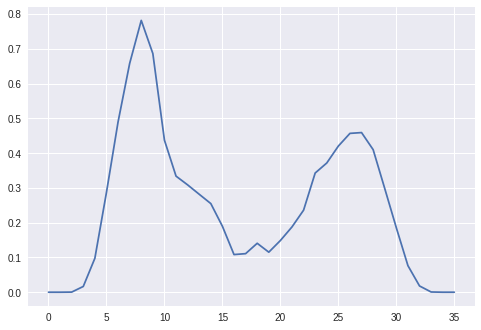

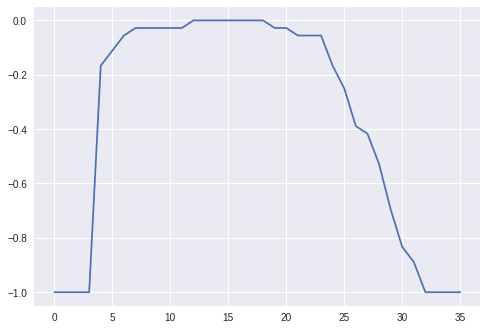

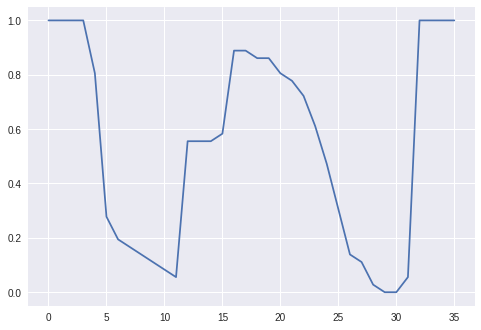

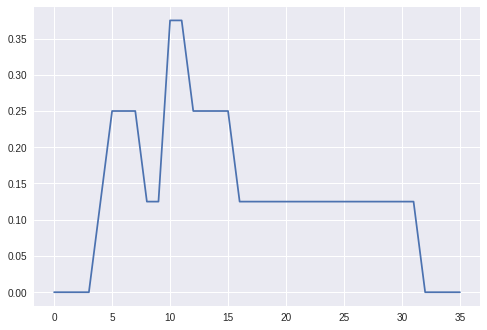

In [10]:
display_plot(test_projection)
display_plot(- test_upper_boundary) # show negative value for easier intuition
display_plot(test_lower_boundary)
display_plot(test_nbits)